In [39]:
import numpy as np
import pandas as pd

runtime_pred=pd.read_csv('../DataOut/runtime_with_predictions.csv')
dwelltime_pred=pd.read_csv('../DataOut/dwelltime_with_predictions.csv')
bustop_locations=pd.read_csv('../Data Sets/bus_stops_and_terminals_654.csv')

In [40]:
# remove the pandas columnn limit
pd.set_option('display.max_columns', None)

In [41]:
runtime_pred=runtime_pred[runtime_pred['direction']==1]

In [42]:
# unique segment values in sorted order
segments=runtime_pred['segment'].unique()
print(segments)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


In [43]:
dwelltime_pred

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,Cluster_3.0,Cluster_0.0,Cluster_1.0,Cluster_2.0,predicted_dwel_time_with_features,predicted_dwel_time_without_features
0,5818.0,262,1,101,1,0,0,0,1,39,0.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,11,10,20.3,0.0,1.8,1,103.0,2,30.0,2022,6,32,33,45,2.0,2.0,51.0,73.483315,70.935320
1,5818.0,262,1,102,1,0,0,0,1,39,26.0,26.0,26.0,26.0,26.0,30.0,26.0,26.0,11,10,20.3,0.0,1.8,1,301.0,1,15.0,2022,6,38,4,45,2.0,2.0,51.0,41.931408,53.602170
2,5818.0,262,1,103,1,0,0,0,1,39,10.0,30.0,30.0,30.0,30.0,15.0,30.0,30.0,11,10,20.3,0.0,1.8,1,463.0,1,15.0,2022,6,46,2,45,2.0,2.0,51.0,28.419070,23.476168
3,5818.0,262,1,104,1,0,0,0,1,39,1.0,1.0,1.0,1.0,1.0,15.0,15.0,30.0,11,10,20.3,0.0,1.8,1,190.0,0,0.0,2022,6,49,27,45,2.0,2.0,51.0,1.778964,0.231284
4,5818.0,262,1,105,1,0,0,0,1,39,47.0,47.0,47.0,47.0,47.0,0.0,15.0,15.0,11,10,20.3,0.0,1.8,1,107.0,2,28.0,2022,6,51,14,45,2.0,2.0,51.0,9.135822,17.800074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8532,12563.0,1166,1,110,0,1,0,0,1,42,19.0,15.0,19.0,19.0,15.0,30.0,10.0,9.0,31,10,19.9,0.0,2.9,1,137.0,1,0.0,2022,7,28,27,86,3.0,0.0,11.0,16.313581,16.369741
8533,12563.0,1166,1,111,0,1,0,0,1,42,7.0,15.0,15.0,12.0,12.0,0.0,30.0,10.0,31,10,19.9,0.0,2.9,1,187.0,0,15.0,2022,7,31,34,86,3.0,0.0,11.0,9.109874,7.892729
8534,12563.0,1166,1,112,0,1,0,0,1,42,0.0,0.0,0.0,8.0,8.0,15.0,0.0,30.0,31,10,19.9,0.0,2.9,1,165.0,0,0.0,2022,7,34,34,86,3.0,0.0,11.0,7.063168,16.983130
8535,12563.0,1166,1,113,0,1,0,0,1,42,15.0,22.0,15.0,16.0,15.0,0.0,15.0,0.0,31,10,19.9,0.0,2.9,1,140.0,1,30.0,2022,7,36,54,86,3.0,0.0,11.0,17.486694,10.851686


In [44]:
# concert  runtime_pred['segment'] to integer
runtime_pred['segment'] = runtime_pred['segment'].astype(int)
runtime_pred['trip_id'] = runtime_pred['trip_id'].astype(int)

In [45]:
Seg_bustop_match={1:['BT01','101'],2:['101','102'],3:['102','103'],4:['103','104'],5:['104','105'],6:['105','106'],7:['106','107'],8:['107','108'],9:['108','109'],10:['109','110'],11:['110','111'],12:['111','112'],13:['112','113'],14:['113','114'],15:['114','BT02']}

# for each segment, get the start and end bus stop ids , and put them in two seperate columns IN runtime_pred
for seg in segments:
    runtime_pred.loc[runtime_pred['segment']==seg,'start_bus_stop']=Seg_bustop_match[seg][0]
    runtime_pred.loc[runtime_pred['segment']==seg,'end_bus_stop']=Seg_bustop_match[seg][1]


In [46]:
runtime_pred

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),norm_cluster,Cluster_0.0,Cluster_1.0,Cluster_2.0,year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count,cluster_in_1_segment_before,cluster_in_2_segment_before,cluster_in_3_segment_before,speed_1_segment_before,last_trip_cluster,norm_cluster_mode,predicted_run_time_with_features,predicted_run_time_without_features,start_bus_stop,end_bus_stop
0,5818,262.0,1.0,1,103.0,0.63,1.0,6.50,0.0,0,1,39.0,75.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0,6.0,11,10,20.3,0.0,1.8,0.0,0.0,33.0,11.0,55.0,2022,3.0,6.513889,0,6.551622,-0.263065,0.289582,1.333333,0.333333,NaN,NaN,NaN,2.497300,2.0,0.0,108.24999,99.961760,BT01,101
1,5818,262.0,1.0,2,301.0,1.28,1.0,6.50,0.0,0,1,39.0,283.0,279.0,279.0,279.0,279.0,103.0,279.0,279.0,6.0,11,10,20.3,0.0,1.8,30.0,0.0,33.0,11.0,55.0,2022,3.0,6.550833,0,10.318498,-0.020071,0.876211,3.000000,1.000000,0.0,NaN,NaN,6.142008,2.0,0.0,239.72423,275.281340,101,102
2,5818,262.0,1.0,3,463.0,2.11,1.0,6.50,0.0,0,1,39.0,487.0,487.0,487.0,487.0,487.0,301.0,103.0,487.0,6.0,11,10,20.3,0.0,1.8,15.0,0.0,33.0,11.0,55.0,2022,3.0,6.638611,0,9.510959,-0.306166,0.668537,7.500000,8.250000,0.0,0.0,NaN,7.113345,2.0,2.0,453.96380,488.007900,102,103
3,5818,262.0,1.0,4,190.0,1.55,1.0,6.75,0.0,0,1,39.0,207.0,209.0,209.0,209.0,209.0,463.0,301.0,103.0,6.0,11,10,20.3,0.0,1.8,15.0,1.0,33.0,11.0,55.0,2022,3.0,6.771389,0,12.014774,-0.072601,0.425698,3.250000,3.750000,2.0,0.0,0.0,7.340499,1.0,1.0,195.89583,212.932080,103,104
4,5818,262.0,1.0,5,107.0,0.84,1.0,6.75,0.0,0,1,39.0,130.0,130.0,130.0,130.0,130.0,190.0,463.0,301.0,6.0,11,10,20.3,0.0,1.8,0.0,2.0,33.0,11.0,55.0,2022,3.0,6.824167,0,14.626720,-0.645813,0.374014,1.250000,1.000000,2.0,2.0,0.0,11.129118,2.0,2.0,127.74015,125.028915,104,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,9131,284.0,1.0,11,97.0,1.10,4.0,9.75,0.0,0,1,41.0,206.0,160.0,152.0,211.0,211.0,122.0,32.0,77.0,9.0,28,10,24.2,0.0,4.7,15.0,1.0,26.0,74.0,0.0,2022,5.0,9.921944,1,16.857172,-0.121372,3.783189,29.394737,30.894737,1.0,1.0,1.0,20.523937,1.0,2.0,169.64880,182.373140,110,111
9691,9131,284.0,1.0,12,133.0,1.31,4.0,9.75,0.0,0,1,41.0,150.0,139.0,181.0,180.0,156.0,97.0,122.0,32.0,9.0,28,10,24.2,0.0,4.7,0.0,1.0,26.0,74.0,0.0,2022,5.0,9.948889,1,17.361381,-0.120115,3.513575,32.289474,34.315789,1.0,1.0,1.0,18.484769,1.0,1.0,151.83200,151.281460,111,112
9692,9131,284.0,1.0,13,141.0,1.15,4.0,9.75,0.0,0,1,41.0,168.0,106.0,178.0,159.0,133.0,133.0,97.0,122.0,9.0,28,10,24.2,0.0,4.7,0.0,1.0,26.0,74.0,0.0,2022,5.0,9.985833,1,17.966975,-0.186211,3.638588,27.394737,29.105263,1.0,1.0,1.0,19.531022,1.0,1.0,141.31177,143.968370,112,113
9693,9131,284.0,1.0,14,91.0,0.89,4.0,10.00,0.0,0,1,41.0,120.0,107.0,105.0,107.0,117.0,141.0,133.0,97.0,10.0,28,10,25.8,0.0,6.8,0.0,1.0,26.0,74.0,0.0,2022,5.0,10.025000,1,16.828766,-0.207720,3.158288,20.236842,22.342105,1.0,1.0,1.0,18.599116,1.0,1.0,107.60917,100.772770,113,114


In [47]:
runtime_pred_for_final=runtime_pred[['trip_id','segment','run_time_in_seconds','predicted_run_time_with_features','predicted_run_time_without_features','start_bus_stop','end_bus_stop']]
dwelltime_pred_for_final=dwelltime_pred[['trip_id','bus_stop','dwell_time_in_seconds','predicted_dwel_time_with_features','predicted_dwel_time_without_features']]

# rename start_bus_stop to bus_stop
runtime_pred_for_final=runtime_pred_for_final.rename(columns={'start_bus_stop':'bus_stop'})

In [48]:
# get all the trip ids in the dwelltime_pred_for_final dataframe , and remove the rows with trip ids that is not in dwelltime_pred_for_final from runtime_pred_for_final
trip_ids_in_dwelltime_pred_for_final=dwelltime_pred_for_final['trip_id'].unique()
runtime_pred_for_final=runtime_pred_for_final[runtime_pred_for_final['trip_id'].isin(trip_ids_in_dwelltime_pred_for_final)]


In [49]:
# print the data dypes of each column in runtime_pred_for_final and dwelltime_pred_for_final
print(runtime_pred_for_final.dtypes)
print(dwelltime_pred_for_final.dtypes)

trip_id                                  int32
segment                                  int32
run_time_in_seconds                    float64
predicted_run_time_with_features       float64
predicted_run_time_without_features    float64
bus_stop                                object
end_bus_stop                            object
dtype: object
trip_id                                 float64
bus_stop                                  int64
dwell_time_in_seconds                   float64
predicted_dwel_time_with_features       float64
predicted_dwel_time_without_features    float64
dtype: object


In [50]:
# convert dwelltime_pred_for_final's bus_stop column to the same type as runtime_pred_for_final's bus_stop column
dwelltime_pred_for_final['bus_stop']=dwelltime_pred_for_final['bus_stop'].astype(str)

C:\Users\gw\AppData\Local\Temp\ipykernel_13544\3347104694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dwelltime_pred_for_final['bus_stop']=dwelltime_pred_for_final['bus_stop'].astype(str)


In [51]:
# left join runtime_pred_for_final to dwelltime_pred_for_final on trip_id and bus_stop
final_pred=pd.merge(runtime_pred_for_final,dwelltime_pred_for_final,on=['trip_id','bus_stop'],how='left')
# rename start_bus_stop to bus_stop
final_pred=final_pred.rename(columns={'bus_stop':'start_bus_stop'})
final_pred

,trip_id,segment,run_time_in_seconds,predicted_run_time_with_features,predicted_run_time_without_features,start_bus_stop,end_bus_stop,dwell_time_in_seconds,predicted_dwel_time_with_features,predicted_dwel_time_without_features
0,5818,1,103.0,108.24999,99.961760,BT01,101,NaN,NaN,NaN
1,5818,2,301.0,239.72423,275.281340,101,102,30.0,73.483315,70.935320
2,5818,3,463.0,453.96380,488.007900,102,103,15.0,41.931408,53.602170
3,5818,4,190.0,195.89583,212.932080,103,104,15.0,28.419070,23.476168
4,5818,5,107.0,127.74015,125.028915,104,105,0.0,1.778964,0.231284
...,...,...,...,...,...,...,...,...,...,...
9120,12563,11,187.0,163.98820,178.749360,110,111,0.0,16.313581,16.369741
9121,12563,12,165.0,202.34630,177.571380,111,112,15.0,9.109874,7.892729
9122,12563,13,140.0,143.09627,155.647830,112,113,0.0,7.063168,16.983130
9123,12563,14,73.0,103.96649,99.030594,113,114,30.0,17.486694,10.851686


In [52]:
# fill nan with 0
final_pred=final_pred.fillna(0)
final_pred

,trip_id,segment,run_time_in_seconds,predicted_run_time_with_features,predicted_run_time_without_features,start_bus_stop,end_bus_stop,dwell_time_in_seconds,predicted_dwel_time_with_features,predicted_dwel_time_without_features
0,5818,1,103.0,108.24999,99.961760,BT01,101,0.0,0.000000,0.000000
1,5818,2,301.0,239.72423,275.281340,101,102,30.0,73.483315,70.935320
2,5818,3,463.0,453.96380,488.007900,102,103,15.0,41.931408,53.602170
3,5818,4,190.0,195.89583,212.932080,103,104,15.0,28.419070,23.476168
4,5818,5,107.0,127.74015,125.028915,104,105,0.0,1.778964,0.231284
...,...,...,...,...,...,...,...,...,...,...
9120,12563,11,187.0,163.98820,178.749360,110,111,0.0,16.313581,16.369741
9121,12563,12,165.0,202.34630,177.571380,111,112,15.0,9.109874,7.892729
9122,12563,13,140.0,143.09627,155.647830,112,113,0.0,7.063168,16.983130
9123,12563,14,73.0,103.96649,99.030594,113,114,30.0,17.486694,10.851686


In [53]:
#create two column , total_arrival_time and total_predicted_arrival_time
final_pred['total_arrival_time']=final_pred['run_time_in_seconds']+final_pred['dwell_time_in_seconds']  

final_pred['total_predicted_arrival_time_without_features']=final_pred['predicted_run_time_without_features']+final_pred['predicted_dwel_time_without_features']
final_pred['total_predicted_arrival_time_with_features']=final_pred['predicted_run_time_with_features']+final_pred['predicted_dwel_time_with_features']

In [54]:
# calculate MAE, MAPE, RMSE for the final_pred dataframe's total_arrival_time and total_predicted_arrival_time columns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# without features
mae_nf=mean_absolute_error(final_pred['total_arrival_time'],final_pred['total_predicted_arrival_time_without_features'])
mape_nf=np.mean(np.abs((final_pred['total_arrival_time']-final_pred['total_predicted_arrival_time_without_features'])/final_pred['total_arrival_time']))*100
rmse_nf=np.sqrt(mean_squared_error(final_pred['total_arrival_time'],final_pred['total_predicted_arrival_time_without_features']))

print(f'Mean Absolute Error without features : {mae_nf}')
print(f'Root Mean Square Error without features : {rmse_nf}')
print(f'Mean Absolute Percentage Error without features : {mape_nf}')

print('\n')
# with features
mae_f=mean_absolute_error(final_pred['total_arrival_time'],final_pred['total_predicted_arrival_time_with_features'])
mape_f=np.mean(np.abs((final_pred['total_arrival_time']-final_pred['total_predicted_arrival_time_with_features'])/final_pred['total_arrival_time']))*100
rmse_f=np.sqrt(mean_squared_error(final_pred['total_arrival_time'],final_pred['total_predicted_arrival_time_with_features']))

print(f'Mean Absolute Error with features : {mae_f}')
print(f'Root Mean Square Error with features : {rmse_f}')
print(f'Mean Absolute Percentage Error with features : {mape_f}')


Mean Absolute Error without features : 34.140885318395036
Root Mean Square Error without features : 55.85606875255211
Mean Absolute Percentage Error without features : 17.785558613983227


Mean Absolute Error with features : 33.66910743156242
Root Mean Square Error with features : 55.00670140893054
Mean Absolute Percentage Error with features : 17.47312055091992


In [55]:
# Mean Absolute Error without features : 34.140885318395036
# Root Mean Square Error without features : 55.85606875255211
# Mean Absolute Percentage Error without features : 17.785558613983227

# cheat
# Mean Absolute Error with features : 31.298052209721654
# Root Mean Square Error with features : 51.489245602253824
# Mean Absolute Percentage Error with features : 16.12670635976211

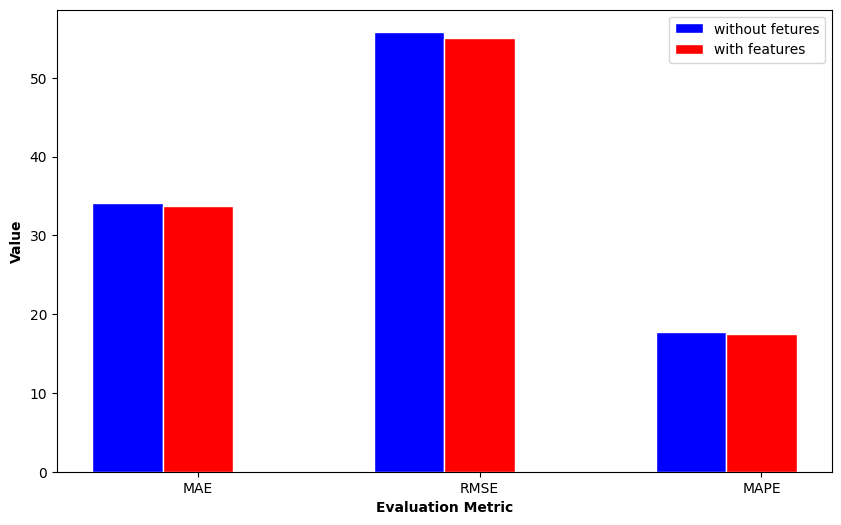

In [56]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a side by side bar chart
import matplotlib.pyplot as plt
import numpy as np

# set width of bar

barWidth = 0.25

# set height of bar

bars1 = [mae_nf,rmse_nf,mape_nf]
bars2 = [mae_f,rmse_f,mape_f]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='without fetures')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='with features')

# Add xticks on the middle of the group bars
plt.xlabel('Evaluation Metric', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MAE', 'RMSE', 'MAPE'])

# Create legend & Show graphic
plt.legend()
plt.show()




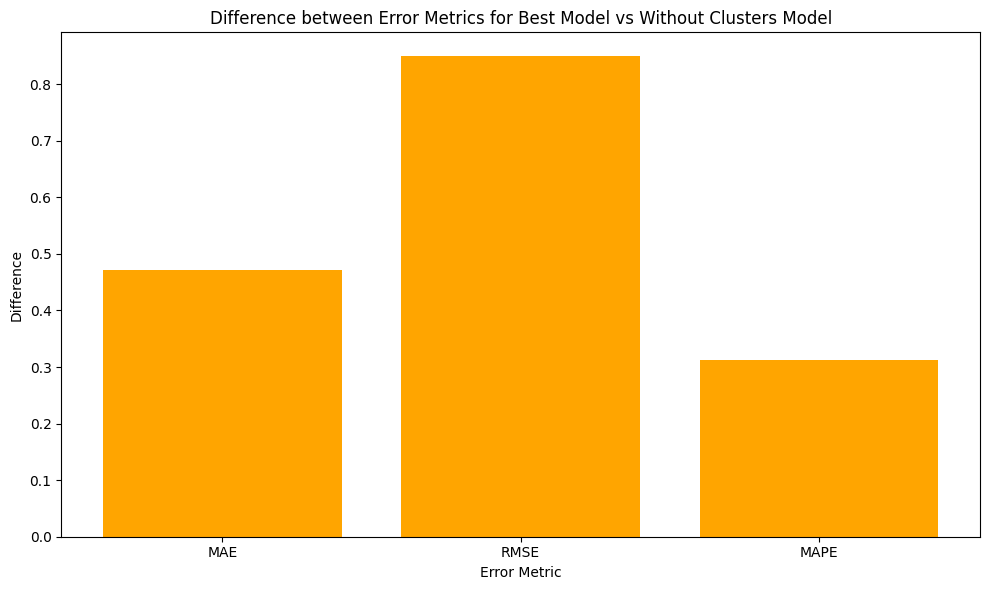

In [57]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a multi bar graph with the 3 values for the difference of each error metric for each model.

# get the difference between MAE,RMSE and MAPE for best model vs the without clusters model
mae_diff = mae_nf - mae_f
rmse_diff = rmse_nf - rmse_f
mape_diff = mape_nf- mape_f

# create a dataframe with the difference between MAE,RMSE and MAPE for best model vs the without clusters model
diff_df = pd.DataFrame({'Error Metric': ['MAE', 'RMSE', 'MAPE'],
                        'Difference': [mae_diff, rmse_diff, mape_diff]})
diff_df

# Create a bar graph for the difference between MAE,RMSE and MAPE for best model vs the without clusters model
plt.figure(figsize=(10, 6))
plt.bar(diff_df['Error Metric'], diff_df['Difference'], align='center',color='orange')
plt.xlabel('Error Metric')
plt.ylabel('Difference')
plt.title('Difference between Error Metrics for Best Model vs Without Clusters Model')
plt.tight_layout()
plt.show()
